In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)#display all columns



In [3]:
checkchurn_df = pd.read_csv('equity_value_data.csv')
checkchurn_df.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


In [4]:
print ("Num of rows: " + str(checkchurn_df.shape[0])) # row count
print ("Num of columns: " + str(checkchurn_df.shape[1])) # col count

Num of rows: 1048575
Num of columns: 3


In [5]:
checkchurn_df['date']=checkchurn_df['timestamp'].map(lambda x: x[0:10])

checkchurn_df['datetime']=pd.to_datetime(checkchurn_df['date'])

#checkchurn_df['seconds']=checkchurn_df['timestamp'].dt.total_seconds()


In [6]:
checkchurn_df.head()

,timestamp,close_equity,user_id,date,datetime
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03,2016-11-16,2016-11-16
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03,2016-11-17,2016-11-17
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03,2016-11-18,2016-11-18
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03,2016-11-21,2016-11-21
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03,2016-11-22,2016-11-22


In [7]:
res = []

for idx in range(len(checkchurn_df.index)-1):
    if (checkchurn_df['user_id'][idx] == checkchurn_df['user_id'][idx+1]) and ( (checkchurn_df['datetime'][idx+1] - checkchurn_df['datetime'][idx]).total_seconds()>= int(2419200)):  
        
        
        res.append(checkchurn_df['user_id'][idx])

    
        
print (len(res))
    

293


In [47]:
s = set(res)
print (len(s))

252


In [9]:
churn_df = pd.read_csv('features_data.csv')
churn_df.head()

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91


In [48]:
print ("Percentage of churned : " + str(100*len(s)/churn_df.shape[0])+'%') 

Percentage of churned : 4.512893982808023%


In [11]:
churn_df['churn'] = churn_df['time_spent']
churn_df.head()

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,33.129417
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,16.573517
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,10.008367
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,1.031633
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,8.187250


In [12]:
for idx in churn_df.index:    
    churn_df['churn'][idx] =  1 if churn_df['user_id'][idx] in res else 0

In [13]:
churn_df.head(10)

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id,churn
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034,0.0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638,0.0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f,0.0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393,0.0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91,0.0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0322b1d744cc89ebbe6ebe70d824d922,0.0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,f4cac8c1544b723ddedc9bdba81c64c0,1.0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,bdc39d2fc664ef9a5e6713168057f892,0.0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,85f2f0f54411b4f3e7a403ba902e7280,0.0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,529ddd19dac72d55cde8e633340a9aed,0.0


In [14]:
# Data Cleaning
# Now there is the real churn data with lables~
#1.check missing data, no missing data
all_data_na = (churn_df.isnull().sum() / len(churn_df)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
risk_tolerance,0.0
investment_experience,0.0
liquidity_needs,0.0
platform,0.0
time_spent,0.0
instrument_type_first_traded,0.0
first_deposit_amount,0.0
time_horizon,0.0
user_id,0.0
churn,0.0


In [15]:
#drop some category features
to_drop = ['user_id']
churn_drop_df = churn_df.drop(to_drop, axis=1)

In [16]:
churn_drop_df.head (10)

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,churn
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,0.0
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,0.0
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,0.0
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,0.0
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,0.0
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0.0
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,1.0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,0.0
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,0.0
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,0.0


In [17]:
#Label encoding categorical features
from sklearn import preprocessing
for f in churn_drop_df.columns:
#     print(churn_drop_df[f].dtype)
    if churn_drop_df[f].dtype != float: 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(churn_drop_df[f].values)) 
        churn_drop_df[f] = lbl.transform(list(churn_drop_df[f].values))

In [18]:
churn_drop_df.head (10)

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,churn
0,0,2,2,0,33.129417,8,40.0,1,0.0
1,2,2,2,0,16.573517,8,200.0,2,0.0
2,2,2,2,2,10.008367,8,25.0,0,0.0
3,2,2,2,0,1.031633,8,100.0,2,0.0
4,0,2,2,0,8.187250,8,20.0,0,0.0
5,2,3,0,2,12.968117,8,100.0,1,0.0
6,1,1,2,0,30.710083,8,5.0,0,1.0
7,0,1,1,2,0.000000,8,100.0,2,0.0
8,0,1,2,2,0.000000,8,5000.0,2,0.0
9,2,3,2,0,2.969617,8,11.0,1,0.0


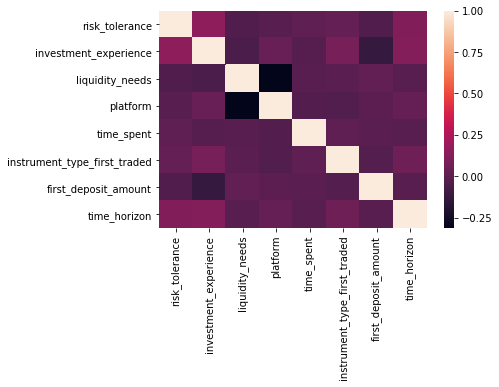

In [19]:
# check correlation
import seaborn as sb
corr = churn_drop_df[["risk_tolerance", "investment_experience", "liquidity_needs",
                    "platform", "time_spent", "instrument_type_first_traded",
                    "first_deposit_amount", "time_horizon"]].corr()

sb.heatmap(corr)

In [20]:
corr
#seems need to keep all categorical features.

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
risk_tolerance,1.000000,0.154137,-0.039705,-0.010369,0.012712,0.029590,-0.035942,0.117339
investment_experience,0.154137,1.000000,-0.053162,0.038527,-0.018126,0.086380,-0.127102,0.124193
liquidity_needs,-0.039705,-0.053162,1.000000,-0.312615,-0.011965,-0.004097,0.016838,-0.011693
platform,-0.010369,0.038527,-0.312615,1.000000,-0.027540,-0.033716,0.004971,0.031035
time_spent,0.012712,-0.018126,-0.011965,-0.027540,1.000000,0.010978,-0.000770,-0.014316
instrument_type_first_traded,0.029590,0.086380,-0.004097,-0.033716,0.010978,1.000000,-0.025246,0.053856
first_deposit_amount,-0.035942,-0.127102,0.016838,0.004971,-0.000770,-0.025246,1.000000,-0.006896
time_horizon,0.117339,0.124193,-0.011693,0.031035,-0.014316,0.053856,-0.006896,1.000000


In [21]:
X = churn_drop_df.drop('churn', axis=1)
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print ("Feature space holds %d observations and %d features" % X.shape)

Feature space holds 5584 observations and 8 features


C:\anaconda\envs\laidata2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda\envs\laidata2\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
X

array([[-0.73547285, -0.1208865 ,  0.53243732, ...,  0.36795819,
        -0.28023105, -0.19978059],
       [ 1.42775095, -0.1208865 ,  0.53243732, ...,  0.36795819,
        -0.20469285,  0.9157942 ],
       [ 1.42775095, -0.1208865 ,  0.53243732, ...,  0.36795819,
        -0.28731276, -1.31535538],
       ...,
       [ 1.42775095,  1.20270212,  0.53243732, ...,  0.36795819,
        -0.27550992,  0.9157942 ],
       [ 1.42775095, -0.1208865 , -1.29718113, ...,  0.36795819,
        -0.25190423, -1.31535538],
       [-0.73547285, -0.1208865 , -1.29718113, ...,  0.36795819,
        -0.27550992, -1.31535538]])

In [23]:
# Get ground truth data
y = churn_drop_df['churn'] 
#print(y)

In [24]:
#Split dataset
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4467 observation with 8 features
test data has 1117 observation with 8 features


In [ ]:
# #SMOTE sampling
# from imblearn.over_sampling import SMOTE

In [26]:
#model training and selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [27]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.957
Model accuracy of KNN is: 0.956
Model accuracy of Random Forest is: 0.955


In [28]:
#find best parameter of Logistic Regression
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [29]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 2, 4, 7, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 2, 4, 7, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print_grid_search_metrics(Grid_LR)

Best score: 0.957
Best parameters set:
	C: 1
	penalty: 'l1'


In [31]:
best_LR_model = Grid_LR.best_estimator_

In [32]:
#Find Optimal Hyperparameters: KNN
parameters = {
    'n_neighbors':[3,5,7,10,15] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.957
Best parameters set:
	n_neighbors: 10


In [34]:
#Find Optimal Hyperparameters: Random Forest
parameters = {
    'n_estimators' : [20,40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print_grid_search_metrics(Grid_RF)

Best score: 0.956
Best parameters set:
	n_estimators: 60


In [36]:
best_RF_model = Grid_RF.best_estimator_

In [37]:
#Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.939
precision is: 0.000
recall is: 0.000


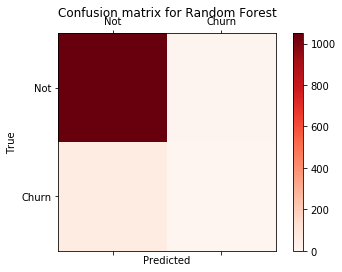

Logistic Regression
Accuracy is: 0.944
precision is: nan
recall is: 0.000


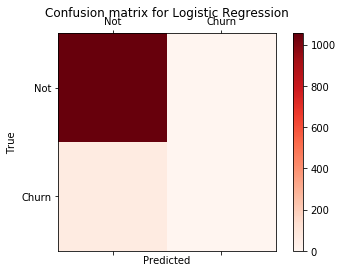

In [38]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

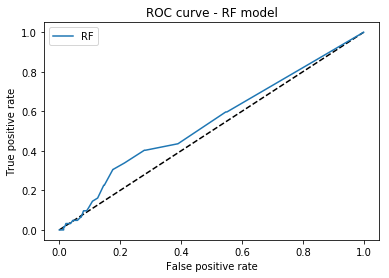

In [39]:
#ROC of RF Model
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [40]:
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

0.5454823421495184

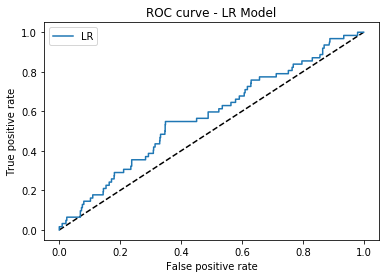

In [41]:
#ROC of LR Model
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [42]:
metrics.auc(fpr_lr,tpr_lr)

0.5750726188656169

In [43]:
#Feature Selection Discussion
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 5), LRmodel_l1.coef_[0]), \
                      churn_drop_df), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
first_deposit_amount: -0.34781
risk_tolerance: 0.17949
platform: -0.12407
liquidity_needs: -0.06094
time_spent: -0.03134
time_horizon: 0.02943
instrument_type_first_traded: 0.02537
investment_experience: -0.00785


In [44]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 5), LRmodel_l2.coef_[0]), \
                      churn_drop_df.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L2) Coefficients
first_deposit_amount: -0.36029
risk_tolerance: 0.18122
platform: -0.12859
liquidity_needs: -0.06616
time_spent: -0.0425
time_horizon: 0.03338
instrument_type_first_traded: 0.02941
investment_experience: -0.01441


In [45]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_drop_df.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
time_spent: 0.5144
first_deposit_amount: 0.2273
investment_experience: 0.0512
time_horizon: 0.0491
risk_tolerance: 0.0454
platform: 0.0393
liquidity_needs: 0.0376
instrument_type_first_traded: 0.0357
